In [79]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data=pd.read_excel("MS_Dhoni_ODI_record.xlsx")

In [81]:
data.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,2004-12-23,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,2004-12-26,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,2004-12-27,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,2005-04-02,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,2005-04-05,ODI # 2236


In [82]:
data.dtypes

score                  object
runs_scored            object
balls_faced            object
strike_rate            object
fours                  object
sixes                  object
opposition             object
ground                 object
date           datetime64[ns]
odi_number             object
dtype: object

In [83]:
data.isnull().sum()

score          0
runs_scored    0
balls_faced    0
strike_rate    0
fours          0
sixes          0
opposition     0
ground         0
date           0
odi_number     0
dtype: int64

#### when data is imported correctly we can now start with Data Cleaning and Preparation
1.At first we will start by removing first 2 characters from opposition string

In [84]:
data["opposition"]=data["opposition"].apply(lambda x: x[2:])


##### Now we will create year column in which match was played. But before that make sure the date column should be in proper datetime format if not covert it into datetime format

In [85]:
data["year"]=data["date"].dt.year.astype(int)

##### Now we will create a column whether Dhoni was not out or out in perticuler innings

In [86]:
data["score"]=data["score"].apply(str)

In [87]:
data["not_out"]=np.where(data["score"].str.endswith('*'),1,0)

###### Now by seeing the data now we can remove the odi_number column because it adds no value to the analysis

In [88]:
data.drop(columns='odi_number',inplace=True)

###### Now we will drop all the records where Dhoni did not bat,and we will store this in new dataframe

In [89]:
data_new=data.loc[((data["score"] != 'DNB') & (data['score']!='TDNB')) ,'runs_scored':]

In [90]:
data_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


##### Now we will fix the datatype of all the columns  present in our new dataframe

In [91]:
data_new.dtypes

runs_scored            object
balls_faced            object
strike_rate            object
fours                  object
sixes                  object
opposition             object
ground                 object
date           datetime64[ns]
year                    int32
not_out                 int32
dtype: object

In [92]:
#fixing the datatype of numerical column
data_new['runs_scored'] = data_new['runs_scored'].astype(int)
data_new['balls_faced'] = data_new['balls_faced'].astype(int)
data_new['strike_rate'] = data_new['strike_rate'].astype(float)
data_new['fours']  = data_new['fours'].astype(int)
data_new['sixes'] = data_new['sixes'].astype(int)

In [93]:
data_new.dtypes

runs_scored             int32
balls_faced             int32
strike_rate           float64
fours                   int32
sixes                   int32
opposition             object
ground                 object
date           datetime64[ns]
year                    int32
not_out                 int32
dtype: object

In [94]:
data_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


# Career Statistics

###### We will have MS Dhoni's Carreer Statistics in ODI carreer

In [95]:
first_match_date=data['date'].dt.date.min().strftime('%B ,%d, %Y') 
print("First match : ",first_match_date)

first_match_opp = data_new.loc[data_new["date"]==first_match_date,'opposition'].values[0]
print("opposition in first match :",first_match_opp)

last_match_date = data["date"].dt.date.max().strftime('%B ,%d ,%Y')
print("Last match :",last_match_date)

last_match_opp = data_new.loc[data_new["date"]==last_match_date,'opposition'].values[0]
print("opposition in last match :",last_match_opp)


numer_of_matches = data.shape[0]
print("number of matches played :",numer_of_matches)

number_of_inngs = data_new.shape[0]
print("number of innings played :",number_of_inngs)

not_outs = data_new["not_out"].sum()
print("Not outs :",not_outs)

outs =data_new["not_out"].count()-data_new["not_out"].sum()
print("outs :",outs)

runs_scored = data_new["runs_scored"].sum()
print("Total runs scored in career :",runs_scored)

balls_faced = data_new["balls_faced"].sum()
print("Total balls faced :",balls_faced)

car_stike_rate = (runs_scored/balls_faced) * 100
print('Career strike rate: {:.2f}'.format(car_stike_rate))

car_avg = (runs_scored / (number_of_inngs - not_outs))
print('Career Average: {:.2f}'.format(car_avg))

Highest_score_date = data_new.loc[data_new.runs_scored == data_new.runs_scored.max(), 'date'].values[0]
print("Date of highest scored :",Highest_score_date)

highest_score = data.loc[data.date == Highest_score_date,'score'].values[0]
print("Highest score :",highest_score)

hundreds = data_new.loc[data_new['runs_scored'] >= 100].shape[0]
print("Number of 100's :",hundreds)

fifties = data_new.loc[(data_new['runs_scored'] >=50) & (data_new['runs_scored']<100)].shape[0]
print("Number of 50's :",fifties)

fours = data_new["fours"].sum()
print("Number of 4's :",fours)

sixes = data_new['sixes'].sum()
print("Number of 6's :",sixes)


First match :  December ,23, 2004
opposition in first match : Bangladesh
Last match : July ,09 ,2019
opposition in last match : New Zealand
number of matches played : 350
number of innings played : 297
Not outs : 84
outs : 213
Total runs scored in career : 10773
Total balls faced : 12303
Career strike rate: 87.56
Career Average: 50.58
Date of highest scored : 2005-10-31T00:00:00.000000000
Highest score : 183*
Number of 100's : 10
Number of 50's : 73
Number of 4's : 826
Number of 6's : 229


This gives us glimpse of MS Dhoni's Overall career. He started playing in Dec 2004 against Bangladesh and last played ODI in
2019 against New Zealand. IN career spanning over 15 years,He has scored 10 hundreds and 73 fifties. He has scored over 10,000 runs
in his career at an average of 50.6 and a strike rate of 87.6.Highest score is 183*.


# Analysis

FIrstly we will look into how many matches he played agianst different oppositions

<AxesSubplot:title={'center':'Number of matches played agianst different teams'}>

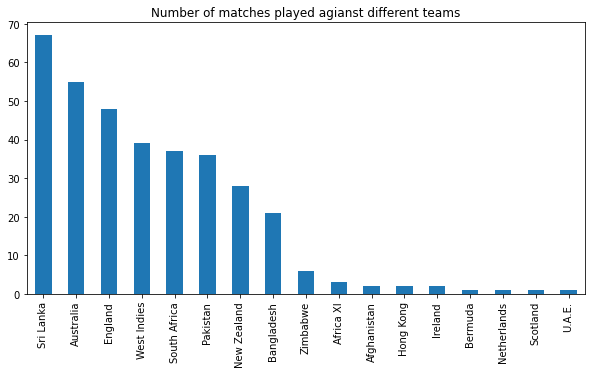

In [96]:
data['opposition'].value_counts().plot(kind="bar",title="Number of matches played agianst different teams",figsize=(10,5))

we can see that he has played the majority of matches against Sri Lanka,Australia,England,west indies, South africa,pakistan

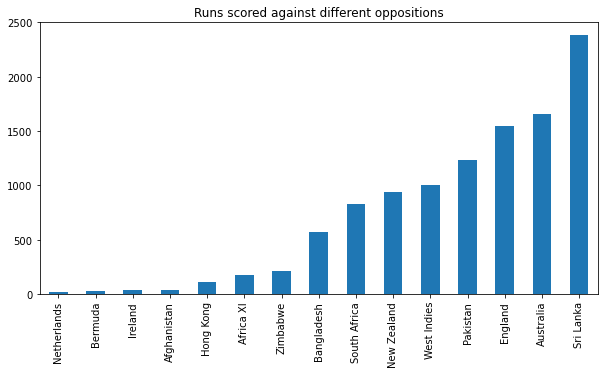

In [97]:
runs_scored_by_opposition=data_new.groupby("opposition")['runs_scored'].sum()
runs_scored_by_opposition = runs_scored_by_opposition.sort_values()
runs_scored_by_opposition.plot(kind="bar",title="Runs scored against different oppositions",figsize=(10,5))
plt.xlabel(None);

We can see that he has scored most runs against Sri Lanka followed by Australia,England,Pakistan and he also played lot matches against these teams so it makes sense

In [98]:
innings_by_opposition = pd.DataFrame(data_new.groupby("opposition")['date'].count())

In [99]:
not_out_by_opposition = pd.DataFrame(data_new.groupby("opposition")['not_out'].sum())

In [100]:
runs_for_innings = pd.concat([runs_scored_by_opposition,innings_by_opposition],axis=1)

In [101]:
avg_by_opposition= runs_for_innings.merge(not_out_by_opposition,left_index=True,right_index=True)

In [102]:
avg_by_opposition.rename(columns={'date' : 'innings'},inplace=True)

In [103]:
avg_by_opposition['out_count'] = avg_by_opposition['innings']-avg_by_opposition['not_out']  ##In cricket, a player's batting average is the total number of runs they have scored divided by the number of times they have been out

In [104]:
avg_by_opposition['average'] = avg_by_opposition['runs_scored']/avg_by_opposition['out_count']
avg_by_opposition.replace(np.inf,np.nan ,inplace=True)

In [105]:
major_nations = ['Australia', 'England', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies']

In [106]:
avg_by_opposition

,runs_scored,innings,not_out,out_count,average
Netherlands,19,1,1,0,NaN
Bermuda,29,1,0,1,29.000000
Ireland,34,1,0,1,34.000000
Afghanistan,36,2,0,2,18.000000
Hong Kong,109,2,1,1,109.000000
Africa XI,174,3,1,2,87.000000
Zimbabwe,208,3,2,1,208.000000
Bangladesh,569,17,5,12,47.416667
South Africa,830,32,6,26,31.923077
New Zealand,940,26,7,19,49.473684


##### Now we have created a table of Ms Dhoni's batting avg. for each team and now we will compare it with career avg with some major teams

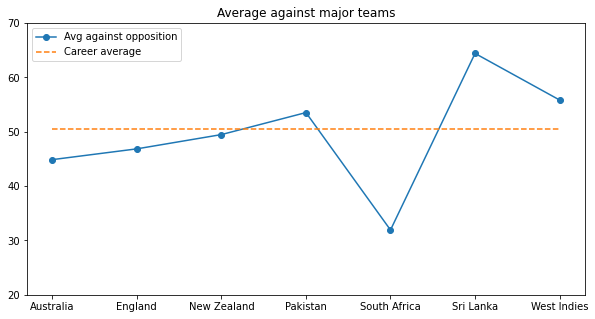

In [107]:
plt.figure(figsize=(10,5))

plt.plot(avg_by_opposition.loc[major_nations,'average'].values,marker = 'o')

plt.plot([car_avg]*len(major_nations),'--')

plt.title("Average against major teams")

plt.xticks(range(0,7),major_nations)

plt.ylim(20,70)

plt.legend(['Avg against opposition', "Career average"]);


Now we can see that Dhoni has played a remarkable innings against major teams like Australia,England,New Zealand,Pakistan , Sri Lanka , and west Indies with a score of close to his career Avg. or slightly higher. The only team he has not played well is South Africa with a lowest batting avg. of around 30.

###### Now we will see year on year statistics.lets look at how many matches he has played each year after his debut

In [108]:
innings_per_year = pd.DataFrame(data_new['year'].value_counts().sort_index())

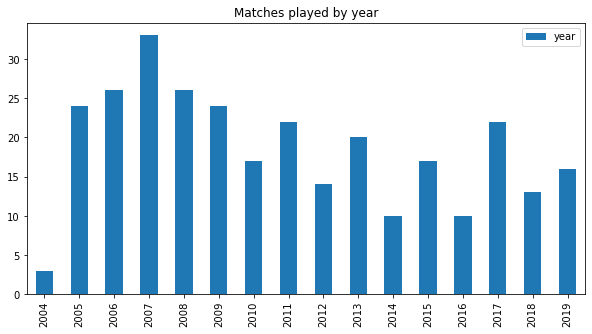

In [109]:
innings_per_year.plot(kind="bar",title="Matches played by year",figsize=(10,5));

By this graph we can see that in the year 2010,2012,2014,2016 Dhoni has played very few matches for india. inshort we can say that after 2005-2009 the average number of matches he played reduced slightly

###### To giving some more clarity to above statistics we will now look at how many runs he has scored every year 

In [110]:
runs_per_year = pd.DataFrame(data_new.groupby('year')['runs_scored'].sum())

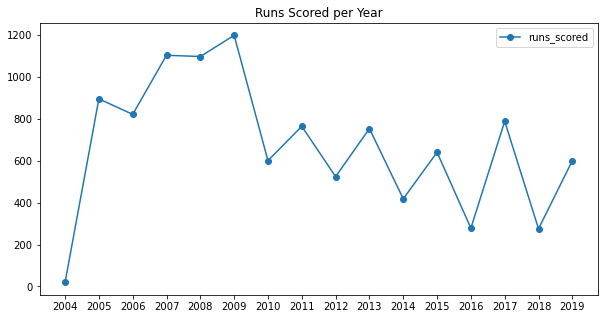

In [111]:
runs_per_year.plot(kind="line",marker="o",title="Runs Scored per Year",figsize=(10,5))
years = data_new['year'].unique().tolist()
plt.xticks(years)
plt.xlabel(None);

BY this we can say that Dhoni has scored more runs in 2009 followed by 2007,2008, because of this he has won the best ODI batsman of the year in 2008.Thje number of runs started reducing post-2010 because number of matches played aslos started reducing 

###### Finally lets look at his career bating average progression by innings

In [122]:
data_new.reset_index(drop=True,inplace=True)

In [123]:
career_average=pd.DataFrame()
career_average["run_scored_in_career"] = data_new["runs_scored"].cumsum()
career_average["innings"] = data_new.index.tolist()
career_average['innings'] = career_average['innings'].apply(lambda x : x+1)
career_average["not_out_in_career"] = data_new["not_out"].cumsum()
career_average["outs_in_career"] = career_average["innings"] - career_average["not_out_in_career"]
career_average["average"] = career_average["run_scored_in_career"] / career_average["outs_in_career"]

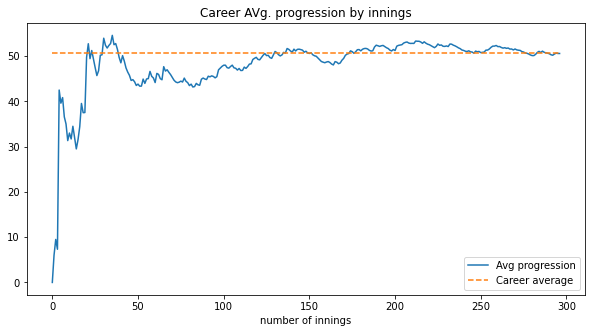

In [125]:
plt.figure(figsize=(10,5))
plt.plot(career_average["average"])
plt.plot([car_avg] * career_average.shape[0],"--")
plt.title("Career AVg. progression by innings")
plt.xlabel("number of innings")
plt.legend(["Avg progression","Career average"]);

